a) SVM classifier has quick training time with large dataset

In [1]:
True

True

b) SVM classifier does not perform well when number of dimensions are more than number of records

In [2]:
False

False

c) SVM classifier can handle both linearly and non-linearly separable datasets.

In [3]:
True

True

In [99]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [100]:
#importing data from url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_name=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data=pd.read_csv(url,names=column_name)



In [101]:
data.shape

(699, 11)

In [102]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [103]:
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [104]:
def unique_value_func(df):
    for col in list(df.columns):
        print('Unique values for columns : {}'.format(col))
        print(df[col].value_counts())

In [105]:
unique_value_func(data)

Unique values for columns : Sample code number
1182404    6
1276091    5
1198641    3
466906     2
1116116    2
          ..
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample code number, Length: 645, dtype: int64
Unique values for columns : Clump Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64
Unique values for columns : Uniformity of Cell Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64
Unique values for columns : Uniformity of Cell Shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64
Unique values for columns : Marginal Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64


In [106]:
data.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [107]:
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [108]:
#remove ? from dataaset
data[data["Bare Nuclei"] == '?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [109]:
data["Bare Nuclei"]=data["Bare Nuclei"].replace('?', data["Bare Nuclei"].replace(['?'], [None]))

In [110]:
data.dropna(inplace=True)

In [111]:
data[data["Bare Nuclei"] == '?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [112]:
data.shape

(683, 11)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [114]:
data.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [115]:
#converting column from object to int64
data=data.astype({'Bare Nuclei': 'int64'})

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


In [117]:
data.head()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [118]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


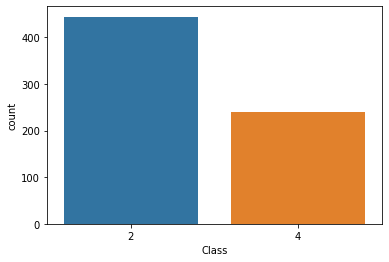

In [119]:
#Find out the number of distinct value we have in output classifier column
sns.countplot(data['Class'],label="Count")

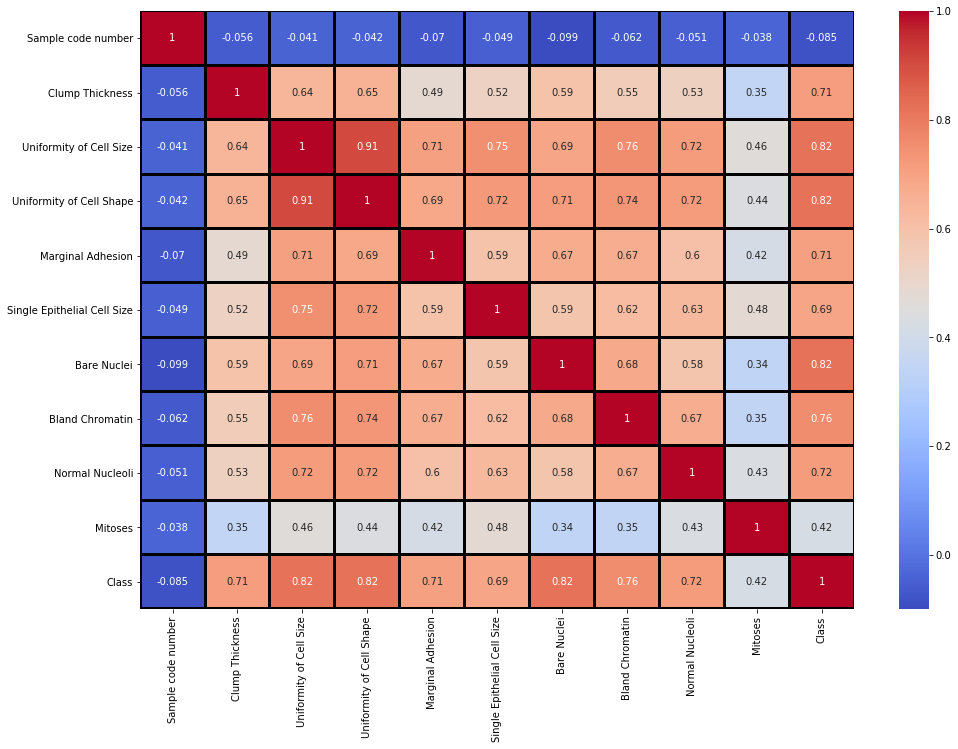

In [120]:
#Find out the correlation of the columns with each other
correlation = data.corr()
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(correlation,cmap='coolwarm',annot=True, linewidths=2, ax=ax,linecolor='black')

In [121]:
# In above heatmap sample code number column is not correlated with class so we can ignore that column

In [122]:
#Split training set and test set 
X=data.iloc[:,1:10].values
y=data.iloc[:,10].values

In [123]:
y.shape

(683,)

In [124]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 0)

In [125]:
# apply feature scaling first since Estimated_Salary column is having high numrical value range compared to other columns
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [126]:
from sklearn.svm import SVC

# a) Use Tr data for building linear SVM model and evaluate it’s performance (F1 score) using Te data.

In [127]:
classifier_linear = SVC(random_state=0,kernel='rbf')
classifier_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [128]:
#Validate the model 
y_pred_linear = classifier_linear.predict(X_test)

In [129]:
#Evaluate the model
#Create confusion Matrix for given Binary classification problem
from sklearn.metrics import confusion_matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

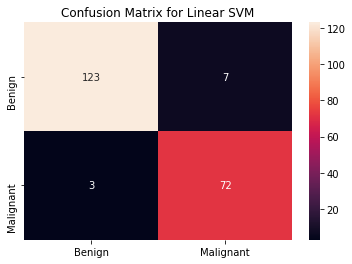

In [130]:
#Plot Confusion Matrix 

ax = plt.axes()
x_axis_label= ['Benign','Malignant']
y_axis_label= ['Benign','Malignant']
sns.heatmap(cm_linear,annot=True, ax = ax, xticklabels=x_axis_label, yticklabels=y_axis_label,fmt='d')
ax.set_title('Confusion Matrix for Linear SVM')
plt.show()


In [131]:
print(f1_score(y_test, y_pred_linear, pos_label=2))

0.9609375


In [132]:
print(accuracy_score(y_test,y_pred_linear))

0.9512195121951219


In [133]:
print(recall_score(y_test,y_pred_linear,pos_label=2))

0.9461538461538461


In [134]:
print(precision_score(y_test,y_pred_linear,pos_label=2))

0.9761904761904762


In [135]:
print("The linear SVM confusion matrix is \n {}".format(cm_linear))
print("The linear SVM f1 score of the matrix is {}".format(f1_score(y_test,y_pred_linear,average='binary',pos_label=2)))
print("The linear SVM accuracy of the matrix is {}".format(accuracy_score(y_test,y_pred_linear)))

The linear SVM confusion matrix is 
 [[123   7]
 [  3  72]]
The linear SVM f1 score of the matrix is 0.9609375
The linear SVM accuracy of the matrix is 0.9512195121951219


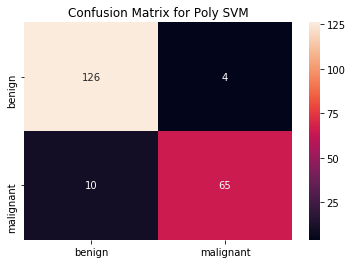

0.9473684210526316
0.9317073170731708
0.9692307692307692
0.9264705882352942
The Poly SVM confusion matrix: 
 [[126   4]
 [ 10  65]]
The Poly SVM f1 score of the matrix : 0.9473684210526316
The Poly SVM accuracy of the matrix : 0.9317073170731708


In [136]:
classifier_poly = SVC(kernel='poly', degree=2)
classifier_poly.fit(X_train, y_train)
#Validate the model 
y_pred_poly = classifier_poly.predict(X_test)
#Evaluate the model
#Create confusion Matrix for given Binary classification problem
from sklearn.metrics import confusion_matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)


#Plot Confusion Matrix 

ax = plt.axes()
x_axis_label= ['benign','malignant']
y_axis_label= ['benign','malignant']
sns.heatmap(cm_poly,annot=True, ax = ax, xticklabels=x_axis_label, yticklabels=y_axis_label,fmt='d')
ax.set_title('Confusion Matrix for Poly SVM')
plt.show()


from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(f1_score(y_test, y_pred_poly, pos_label=2))
print(accuracy_score(y_test,y_pred_poly))
print(recall_score(y_test,y_pred_poly,pos_label=2))
print(precision_score(y_test,y_pred_poly,pos_label=2))

print("The Poly SVM confusion matrix: \n {}".format(cm_poly))
print("The Poly SVM f1 score of the matrix : {}".format(f1_score(y_test,y_pred_poly,average='binary',pos_label=2)))
print("The Poly SVM accuracy of the matrix : {}".format(accuracy_score(y_test,y_pred_poly)))

In [137]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

result_data = [['Linear',f1_score(y_test, y_pred_linear, pos_label=2),accuracy_score(y_test,y_pred_linear),recall_score(y_test,y_pred_linear,pos_label=2),precision_score(y_test,y_pred_linear,pos_label=2)], 
               ['Poly',f1_score(y_test, y_pred_poly, pos_label=2),accuracy_score(y_test,y_pred_poly),recall_score(y_test,y_pred_poly,pos_label=2),precision_score(y_test,y_pred_poly,pos_label=2)]]
result_df = pd.DataFrame(result_data, columns = ['SVM_Type', 'f1_score','accuracy_score','recall_score','precision_score']) 

In [138]:
list(result_df.columns[1:])

['f1_score', 'accuracy_score', 'recall_score', 'precision_score']

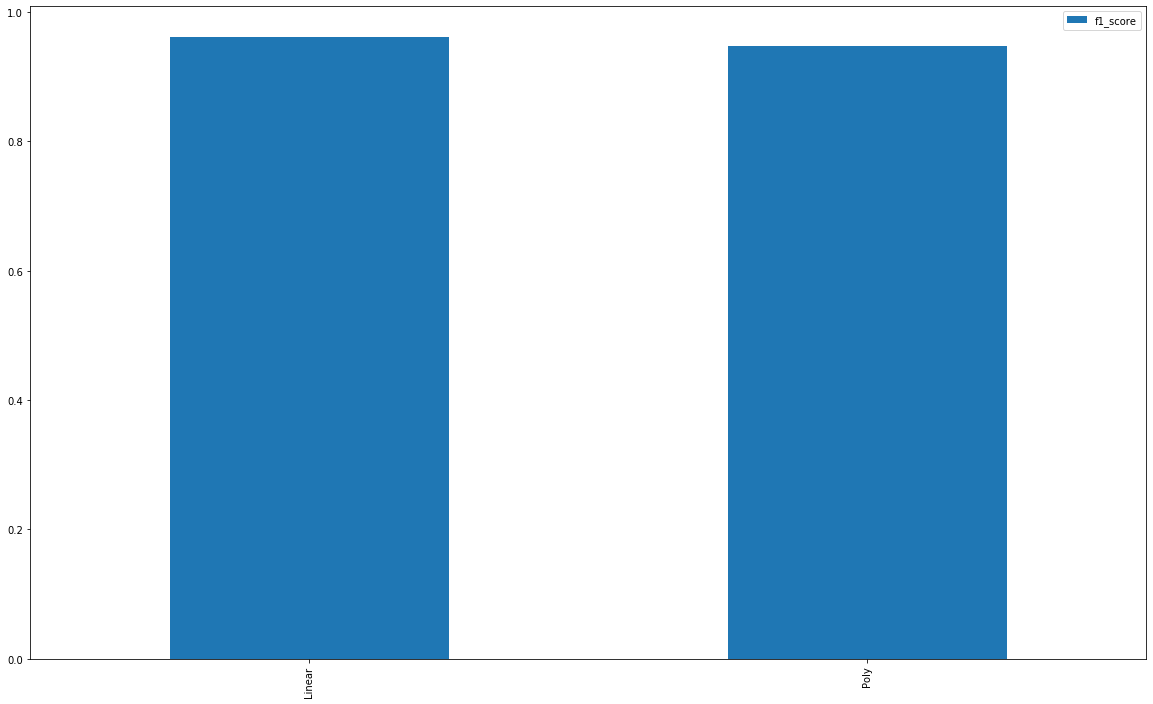

In [139]:
df_1=pd.DataFrame(result_df.iloc[:,1:2])
df_1.index=['Linear','Poly']
df_1.plot(kind='bar',stacked=True, figsize=(20,12))

Text(0.5, 0, "['Linear SVM = 0', 'Poly SVM = 1 ']")

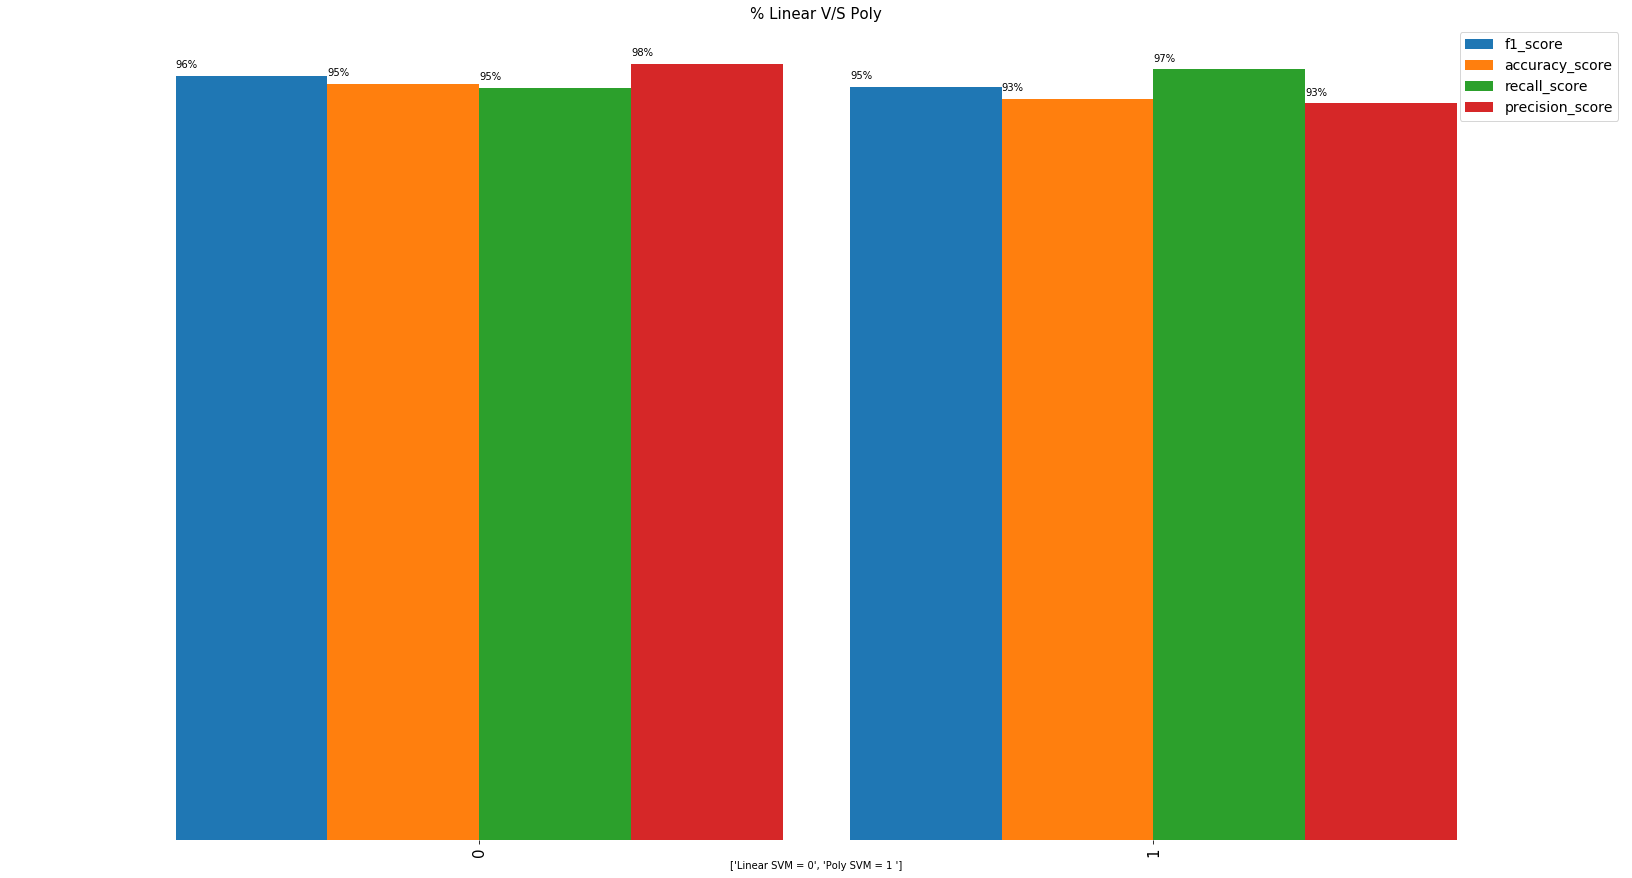

In [140]:

colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax = (result_df[:]).plot(kind='bar',figsize=(29,15),width = 0.9,edgecolor=None)
plt.legend(labels=list(result_df.columns[1:]),fontsize= 14)
plt.title("% Linear V/S Poly",fontsize= 15)
plt.xticks(fontsize=15)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

plt.xlabel(['Linear SVM = 0','Poly SVM = 1 '])